In [ ]:
!pip install efficient_apriori

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules#, fpgrowth 
from PIL import Image

dataset = pd.read_csv('/content/drive/MyDrive/Data files/store_data.csv', header = None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visual Observation

> Plot bar graph

> Sum amount of item appearances

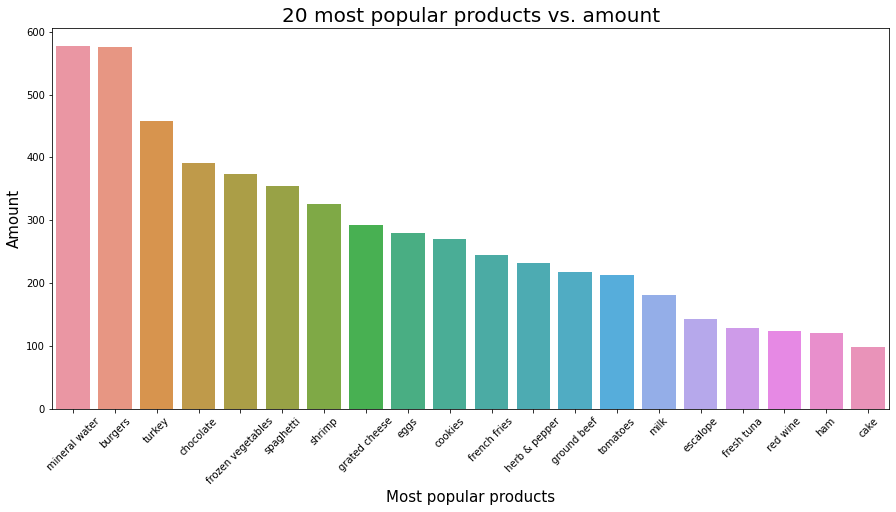

In [ ]:
Twenty_Products = pd.DataFrame(dataset[0].value_counts()).head(20)

sns.barplot(x = Twenty_Products.index, y = Twenty_Products[0])

labels =Twenty_Products.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('20 most popular products vs. amount', fontsize = 20)
plt.xlabel('Most popular products', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] , labels = labels, rotation = '45')
plt.show()

In [ ]:
Twenty_Products = pd.DataFrame(dataset[0].value_counts()).head(20)
Twenty_Products.columns = ['Amount']
Twenty_Products.head(10).style.background_gradient(cmap='plasma')

,Amount
mineral water,577
burgers,576
turkey,458
chocolate,391
frozen vegetables,373
spaghetti,354
shrimp,325
grated cheese,293
eggs,279
cookies,270


In [ ]:
Twenty_Products["Item"] = Twenty_Products.index
Twenty_Products["20 most popular items"] = "20 most popular items"
Twenty_Products['index'] = list(range(len(Twenty_Products)))
Twenty_Products.set_index('index')
Twenty_Products = Twenty_Products[['Item','Amount',"20 most popular items"]]

## TREEMAP
# fig = px.treemap(Twenty_Products, path=["20 most popular items", 'Item'], values='Amount',
#                   color=Twenty_Products["Amount"], hover_data=['Item'],
#                   color_continuous_scale='plasma',
#                   )
# fig.show()

# Data Prepping & Formatting 

> Make a List of receipt transactions

> Form booolean matrix

> Encode matrix to 1 and 0

In [ ]:
receipts = []
# collect rows into list
for i in range(dataset.shape[0]):
    receipts.append([str(dataset.values[i,j]) for j in range(dataset.shape[1])])
# list as array
receipts = np.array(receipts)

In [ ]:
# Assign Transation Encoder
TE = TransactionEncoder()
dataset2 = TE.fit_transform(receipts)
# Form a boolean document term matrix Dataframe
dataset2 = pd.DataFrame(dataset2, columns = TE.columns_)
dataset2.head(3)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset_20 = dataset2.copy()
# Segment the top 20 items from the original.
dataset_20 = dataset_20[Twenty_Products["Item"]]

In [ ]:
def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1

In [ ]:
dataset_20 = dataset_20.applymap(encode_units) # Element wise function in DF.
dataset_20.head(3)

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,french fries,herb & pepper,ground beef,tomatoes,milk,escalope,fresh tuna,red wine,ham,cake
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Support & Pruning

In [ ]:
frequent_itemsets = apriori(dataset_20, min_support = 0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
116,0.010132,"(mineral water, ground beef, eggs)",3
117,0.013065,"(mineral water, milk, eggs)",3
118,0.011065,"(mineral water, ground beef, milk)",3
119,0.010532,"(eggs, chocolate, spaghetti)",3


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] >= 2) &
                   (frequent_itemsets['support'] >= 0.04) ].sort_values('support', ascending = False)

,support,itemsets,length
24,0.059725,"(mineral water, spaghetti)",2
22,0.052660,"(mineral water, chocolate)",2
27,0.050927,"(mineral water, eggs)",2
32,0.047994,"(mineral water, milk)",2
30,0.040928,"(mineral water, ground beef)",2


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 3)].head(5).sort_values('support', ascending = False)

,support,itemsets,length
106,0.015865,"(mineral water, chocolate, spaghetti)",3
109,0.013998,"(mineral water, milk, chocolate)",3
107,0.013465,"(mineral water, eggs, chocolate)",3
110,0.011998,"(mineral water, frozen vegetables, spaghetti)",3
108,0.010932,"(mineral water, ground beef, chocolate)",3


# Algo Summary

In [ ]:
frq_items = apriori(dataset_20, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
212,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
224,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
166,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
184,"(milk, frozen vegetables)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136
206,"(milk, spaghetti)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,0.007278,1.368879
